In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('student-por.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [6]:
columns = df.columns
for column in columns:
    print(df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    

school
GP    65.2%
MS    34.8%
Name: proportion, dtype: object
sex
F    59.0%
M    41.0%
Name: proportion, dtype: object
age
17    27.6%
16    27.3%
18    21.6%
15    17.3%
19     4.9%
20     0.9%
21     0.3%
22     0.2%
Name: proportion, dtype: object
address
U    69.6%
R    30.4%
Name: proportion, dtype: object
famsize
GT3    70.4%
LE3    29.6%
Name: proportion, dtype: object
Pstatus
T    87.7%
A    12.3%
Name: proportion, dtype: object
Medu
2    28.7%
4    27.0%
1    22.0%
3    21.4%
0     0.9%
Name: proportion, dtype: object
Fedu
2    32.2%
1    26.8%
3    20.2%
4    19.7%
0     1.1%
Name: proportion, dtype: object
Mjob
other       39.8%
services    21.0%
at_home     20.8%
teacher     11.1%
health       7.4%
Name: proportion, dtype: object
Fjob
other       56.5%
services    27.9%
at_home      6.5%
teacher      5.5%
health       3.5%
Name: proportion, dtype: object
reason
course        43.9%
home          23.0%
reputation    22.0%
other         11.1%
Name: proportion, dtype: object


In [7]:
#create a new dataframe with first set of deleted columns, which are Mjob, Fjob, G1 and G2
df_new = df[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3']]

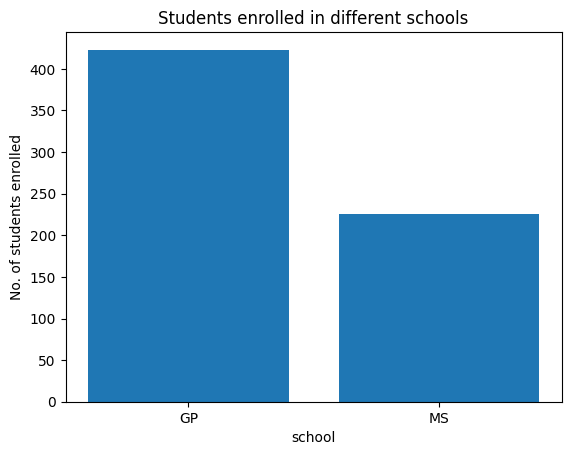

In [148]:
#breakdown by school
plt.bar(['GP', 'MS'],df_new['school'].value_counts())
plt.xlabel("school")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different schools")
plt.show()

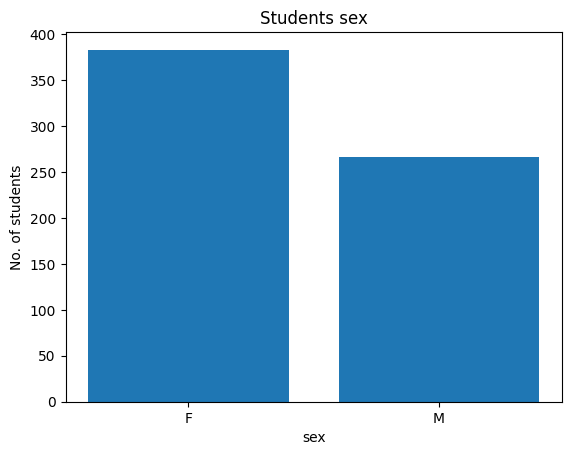

In [10]:
#breakdown by sex

plt.bar(['F', 'M'],df_new['sex'].value_counts())
plt.xlabel("sex")
plt.ylabel("No. of students")
plt.title("Students sex")
plt.show()


In [24]:
df_alcohol = df[['sex', 'age', 'Dalc','Walc', 'health']]
df_alcohol

,sex,age,Dalc,Walc,health
0,F,18,1,1,3
1,F,17,1,1,3
2,F,15,2,3,3
3,F,15,1,1,5
4,F,16,1,2,5
...,...,...,...,...,...
644,F,19,1,2,5
645,F,18,1,1,1
646,F,18,1,1,5
647,M,17,3,4,2


Text(0.5, 1.0, 'students age 20')

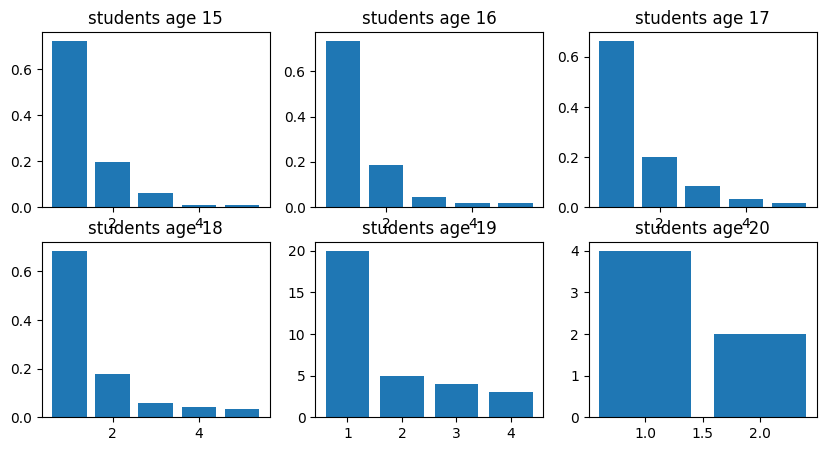

In [71]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(2, 3,1)
ax1.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==15]['Dalc'].value_counts(normalize=True))
ax2 = plt.subplot(2, 3,2)
ax2.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==16]['Dalc'].value_counts(normalize=True))
ax3 = plt.subplot(2, 3,3)
ax3.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==17]['Dalc'].value_counts(normalize=True))
ax4 = plt.subplot(2, 3,4)
ax4.bar([1,2,3,4,5], df_alcohol[df_alcohol['age']==18]['Dalc'].value_counts(normalize=True))
ax5 = plt.subplot(2, 3,5)
ax5.bar([1,2,3,4], df_alcohol[df_alcohol['age']==19]['Dalc'].value_counts())
ax6 = plt.subplot(2, 3,6)
ax6.bar([1,2], df_alcohol[df_alcohol['age']==20]['Dalc'].value_counts())

ax1.set_title('students age 15')
ax2.set_title('students age 16')
ax3.set_title('students age 17')
ax4.set_title('students age 18')
ax5.set_title('students age 19')
ax6.set_title('students age 20')

In [ ]:
#Reduce traveltime to binary values: less than 15 mins or greater than 15mins
df_new[df_new['traveltime'] > 1] = 2
df_new['traveltime'].value_counts()

In [130]:
#Combine failues 
df_new[df_new['failures'] > 0] = 1
df_new['failures'].value_counts()

/var/folders/m4/kwmg1zjs75j99y7p7rtp4wcc0000gn/T/ipykernel_15490/465486563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[df_new['failures'] > 0] = 1


failures
0    549
1    100
Name: count, dtype: int64